## 滤波器设计

### FIR 滤波器设计

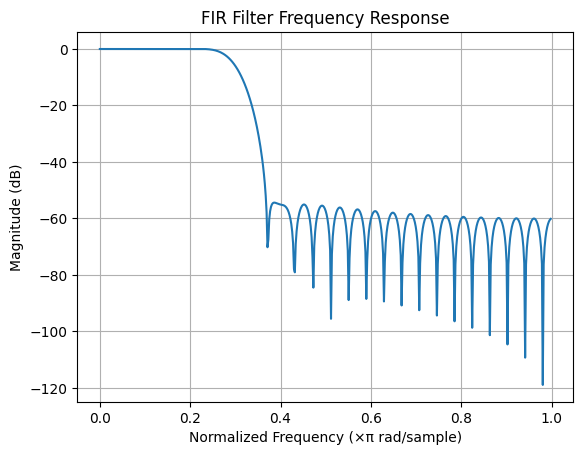

In [1]:
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt
import numpy as np

# 设计一个低通 FIR 滤波器
numtaps = 51  # 滤波器阶数 + 1
cutoff = 0.3  # 截止频率 (归一化为 Nyquist 频率的比例)
fir_coeffs = firwin(numtaps, cutoff)

# 计算频率响应
w, h = freqz(fir_coeffs)

# 可视化频率响应
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('FIR Filter Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()


### IIR 滤波器设计

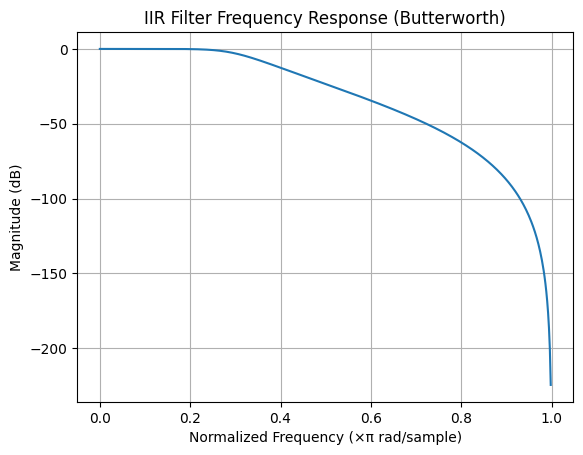

In [2]:
from scipy.signal import butter, freqz

# 设计一个低通 IIR 滤波器 (Butterworth)
order = 4  # 滤波器阶数
cutoff = 0.3  # 截止频率 (归一化为 Nyquist 频率的比例)
b, a = butter(order, cutoff, btype='low')

# 计算频率响应
w, h = freqz(b, a)

# 可视化频率响应
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('IIR Filter Frequency Response (Butterworth)')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()


## 信号卷积和去卷积

### 卷积

In [3]:
from scipy.signal import convolve

# 信号和脉冲响应
signal = np.array([1, 2, 3, 4, 5])
impulse_response = np.array([0.2, 0.5, 0.2])

# 卷积
result = convolve(signal, impulse_response, mode='full')
print("Convolution result:", result)


Convolution result: [0.2 0.9 1.8 2.7 3.6 3.3 1. ]


### 去卷积

In [4]:
from scipy.signal import deconvolve

# 信号和系统响应
convolved_signal = np.array([0.2, 0.9, 2.1, 3.3, 4.3, 2.7, 1.0])
impulse_response = np.array([0.2, 0.5, 0.2])

# 去卷积
recovered_signal, remainder = deconvolve(convolved_signal, impulse_response)
print("Recovered signal:", recovered_signal)


Recovered signal: [1.    2.    4.5   3.25  8.875]


## 窗函数

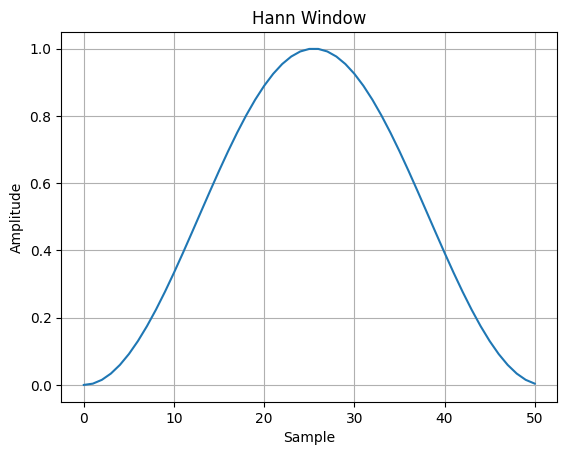

In [5]:
from scipy.signal import get_window
import matplotlib.pyplot as plt

# 获取汉宁窗
window = get_window('hann', 51)

# 可视化窗函数
plt.plot(window)
plt.title('Hann Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


## 傅里叶变换

### 短时傅里叶变换 (STFT)

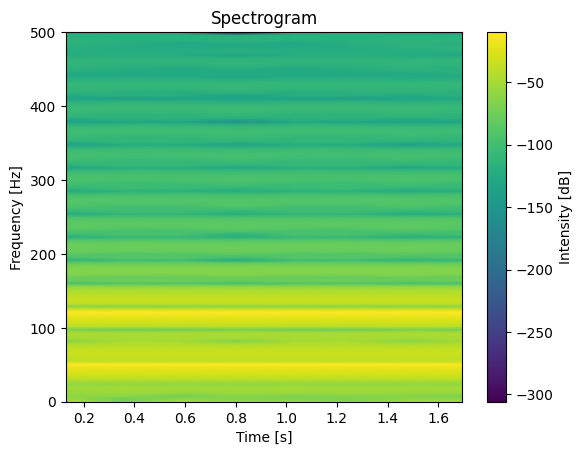

In [6]:
from scipy.signal import spectrogram

# 生成一个正弦信号
fs = 1000  # 采样频率
t = np.linspace(0, 2, 2 * fs, endpoint=False)  # 时间轴
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# 计算频谱图
frequencies, times, Sxx = spectrogram(signal, fs)

# 可视化频谱图
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Intensity [dB]')
plt.show()


### 希尔伯特变换

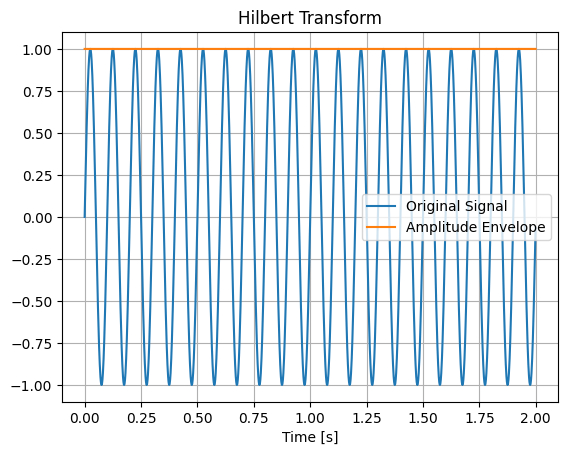

In [7]:
from scipy.signal import hilbert

# 生成一个信号
signal = np.sin(2 * np.pi * 10 * t)

# 计算希尔伯特变换
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))

# 可视化包络线
plt.plot(t, signal, label='Original Signal')
plt.plot(t, amplitude_envelope, label='Amplitude Envelope')
plt.legend()
plt.title('Hilbert Transform')
plt.xlabel('Time [s]')
plt.grid()
plt.show()



---

### **总结**

| **功能**               | **方法**                          | **描述**                                             |
|-----------------------|----------------------------------|---------------------------------------------------|
| **滤波器设计**          | `firwin`, `butter`               | FIR 和 IIR 滤波器的设计与频率响应计算。               |
| **信号卷积与去卷积**     | `convolve`, `deconvolve`         | 信号的卷积和反卷积。                                  |
| **窗函数**             | `get_window`                    | 提供多种窗函数（如汉宁窗、汉明窗等）。                    |
| **傅里叶变换**          | `spectrogram`, `hilbert`         | 计算短时傅里叶变换和希尔伯特变换，用于频谱分析和信号包络计算。|

